In [12]:
# Install and import TF2
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
# Additional imports
from tensorflow.keras.layers import Input,Dense,Flatten,SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

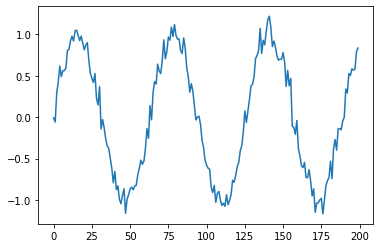

In [14]:
# Make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# Plot it
plt.plot(series)

In [15]:
### Build the dataset
# lets see if we cn use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) -T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1) # now the dat should be N x T X D
Y = np.array(Y)
N = len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [25]:
# Try the Simple RNN model
i = Input(shape=(T,1))
x = SimpleRNN(5,activation='relu')(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 9ms/sample - loss: 0.1320 - val_loss: 0.0580
Epoch 2/80
95/95 [==============================] - 0s 328us/sample - loss: 0.0689 - val_loss: 0.0427
Epoch 3/80
95/95 [==============================] - 0s 291us/sample - loss: 0.0319 - val_loss: 0.0578
Epoch 4/80
95/95 [==============================] - 0s 286us/sample - loss: 0.0429 - val_loss: 0.0340
Epoch 5/80
95/95 [==============================] - 0s 317us/sample - loss: 0.0259 - val_loss: 0.0388
Epoch 6/80
95/95 [==============================] - 0s 285us/sample - loss: 0.0325 - val_loss: 0.0303
Epoch 7/80
95/95 [==============================] - 0s 379us/sample - loss: 0.0244 - val_loss: 0.0369
Epoch 8/80
95/95 [==============================] - 0s 316us/sample - loss: 0.0273 - val_loss: 0.0294
Epoch 9/80
95/95 [==============================] - 0s 318us/sample - loss: 0.0228 - val_loss: 0.0296
Epoch 10/80
95/95 [=====================

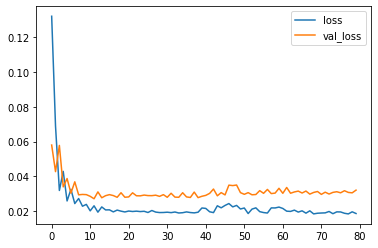

In [26]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

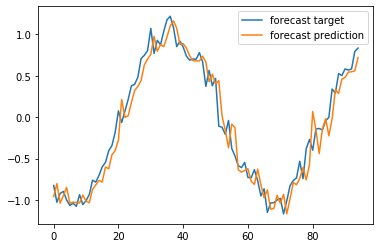

In [28]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1,1))[0,0] #1x1 array => scalar
  i += 1
  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

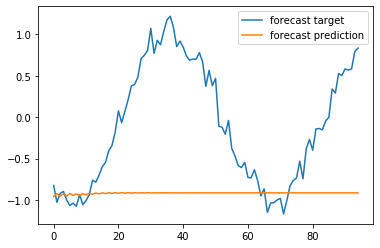

In [29]:
# Forecast future values (use only self-predictions for making predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] #!-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1,1))[0,0] #1x1 array => scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()